In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

In [29]:
matrix_paths = glob('data/Official Adjacency Matrices/*')
adj_matrices = [pd.read_csv(path) for path in matrix_paths]
artists      = [m['artist'] for m in adj_matrices]
matrices     = [m.drop(labels='artist', axis=1).to_numpy() for m in adj_matrices]

In [185]:
years     = ['2008-2010',
             '2011-2013', 
             '2014-2016', 
             '2017-2019', 
             '2020-2022']

In [117]:
artist_genres = pd.read_csv('data/artist_genres.csv')
name = artist_genres['artist']; genre = artist_genres['top_genre']

<BarContainer object of 94 artists>

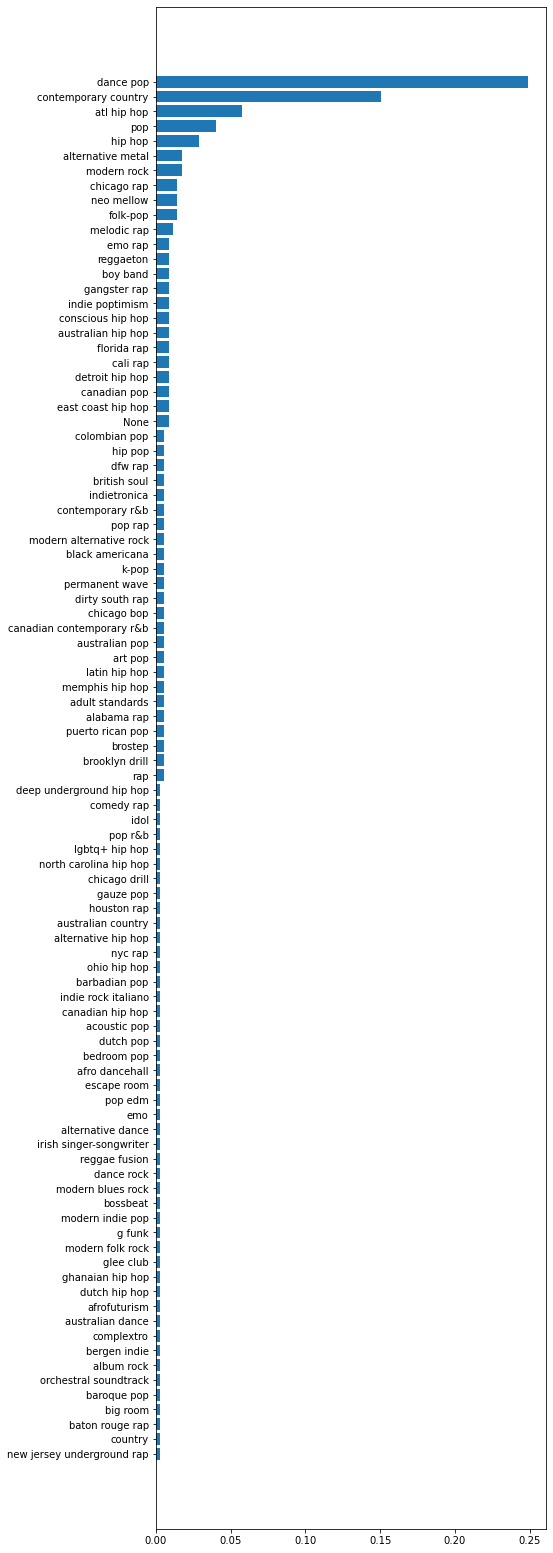

In [155]:
# distribution of genres
genre_dist = genre.value_counts(normalize=True, ascending=True)
plt.figure(figsize=(7,28))
plt.barh(genre_dist.index, genre_dist)

In [118]:
num_to_artist   = [{i: name for i, name in enumerate(artist)} for artist in artists]
artist_to_genre = {a: g for a, g in zip(name, genre)}

In [97]:
graphs = [nx.Graph(m) for m in matrices]

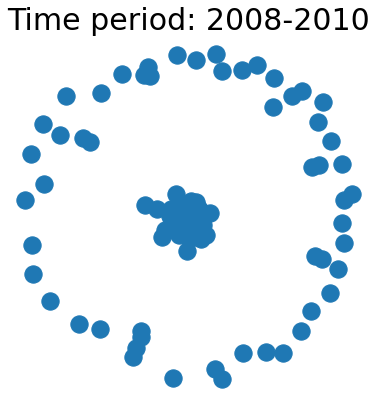

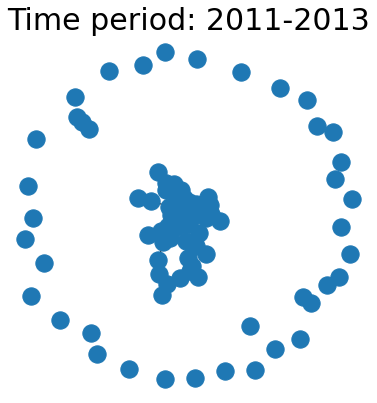

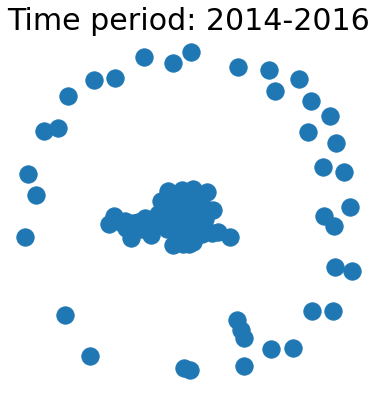

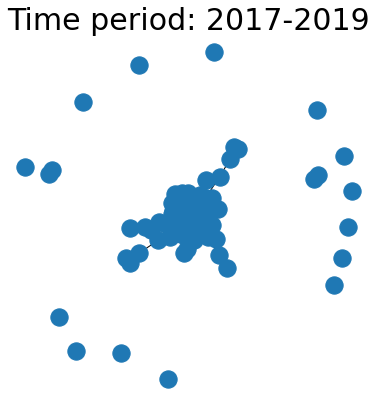

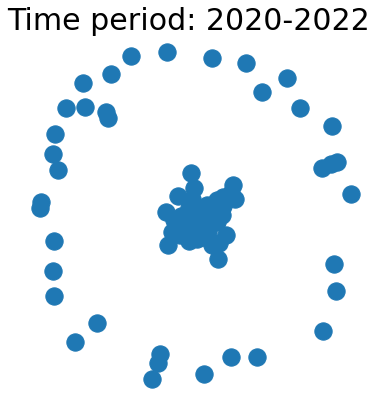

In [191]:
for j, G in enumerate(graphs):
    plt.figure(figsize=(5,5))
    nx.draw(G)
    plt.title(f'Time period: {years[j]}', fontsize=30)
plt.show()

## Global properties:

In [142]:
num_edges = [nx.number_of_edges(G) for G in graphs]
num_cc    = [nx.number_connected_components(G) for G in graphs]
density   = [nx.density(G) for G in graphs]

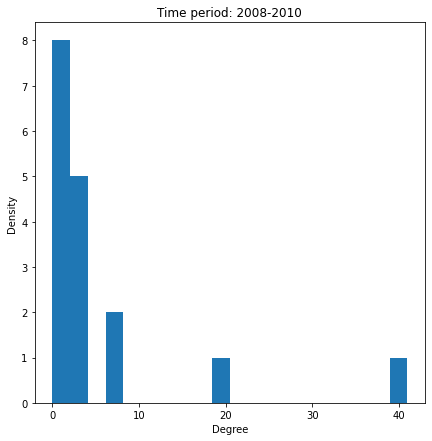

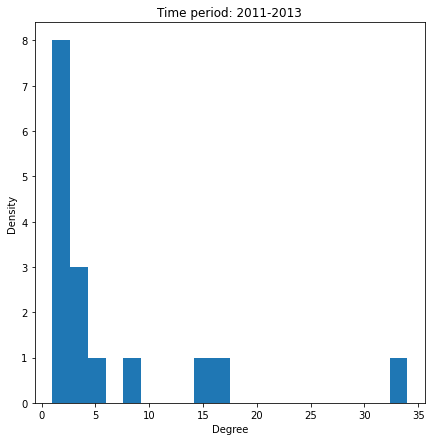

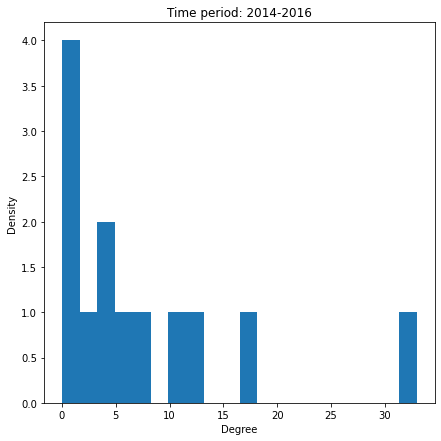

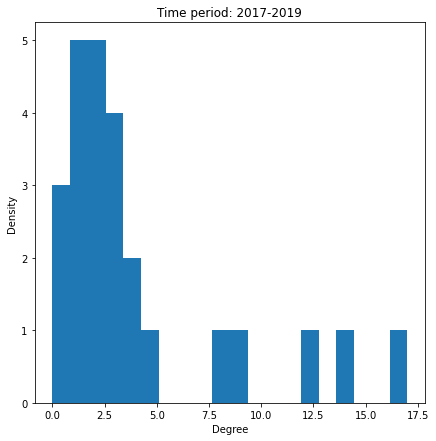

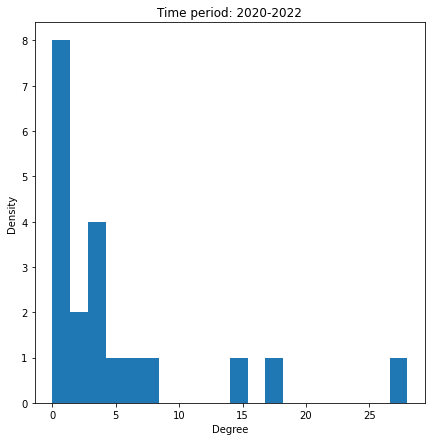

In [143]:
deg_hists = [nx.degree_histogram(G) for G in graphs]
for i in range(len(graphs)):
    fig = plt.figure(figsize=(7,7))
    plt.hist(deg_hists[i], bins=20)
    plt.xlabel('Degree')
    plt.ylabel('Density')
    plt.title(f'Time period: {years[i]}')
plt.show()

In [144]:
degrees = [dict(nx.degree(G)) for G in graphs]
arrays  = [np.array(list(degree.items())) for degree in degrees]
corr    = [np.corrcoef(a, rowvar=False)[0, 1] for a in arrays]

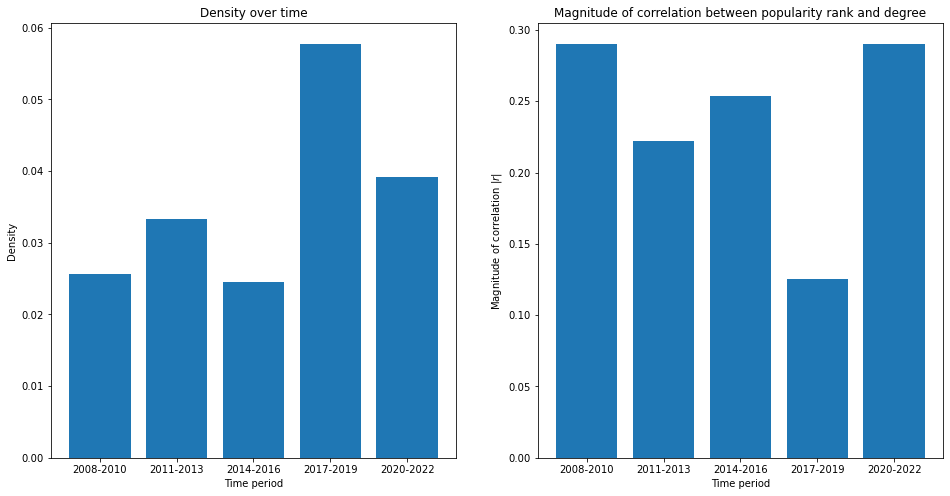

In [184]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].bar(years, density)
axs[0].set_xlabel('Time period')
axs[0].set_ylabel('Density')
axs[0].set_title('Density over time')
axs[1].bar(years, [-r for r in corr])
axs[1].set_xlabel('Time period')
axs[1].set_ylabel(r'Magnitude of correlation $|r|$')
axs[1].set_title('Magnitude of correlation between popularity rank and degree')
plt.show()

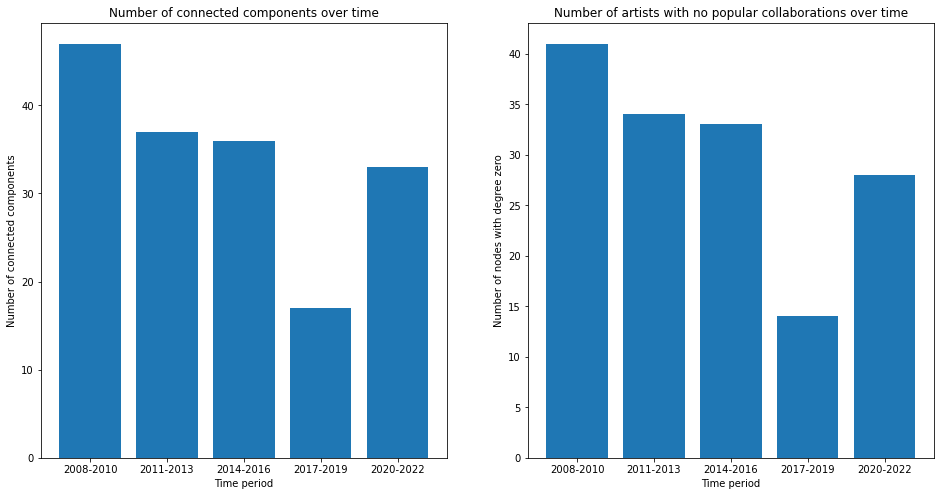

In [192]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].bar(years, num_cc)
axs[0].set_xlabel('Time period')
axs[0].set_ylabel('Number of connected components')
axs[0].set_title('Number of connected components over time')
axs[1].bar(years, num_zero)
axs[1].set_xlabel('Time period')
axs[1].set_ylabel('Number of nodes with degree zero')
axs[1].set_title('Number of artists with no popular collaborations over time')
plt.show()

In [145]:
def num_zero(iterable):
    array = np.array(list(iterable)) 
    return sum(array == 0)
num_zero = [num_zero(deg.values()) for deg in degrees]

In [146]:
def most(deg_dict, j):
    sort = sorted(deg_dict.items(), key=lambda x: x[1], reverse=True)
    num_collabs = sort[0][1]
    artist_node = sort[0][0]
    artist      = num_to_artist[j][artist_node]
    return artist, str(num_collabs), sort
most_collabs      = [': '.join(most(deg, j)[0:2]) for j, deg in enumerate(degrees)]
sorted_by_collabs = [most(deg, j)[2] for j, deg in enumerate(degrees)]

In [147]:
df = pd.DataFrame(
             {'Number of edges': num_edges, 
              'Number of components': num_cc,
              'Density': density,
              'Popularity-degree correlation': corr,
              'Number of zero-degree nodes': num_zero,
              'Most collaborated artist: number of collabs': most_collabs}, 
             index = years)
df.style

,Number of edges,Number of components,Density,Popularity-degree correlation,Number of zero-degree nodes,Most collaborated artist: number of collabs
2008-2010,127,47,0.025657,-0.290137,41,Lil Wayne: 16
2011-2013,165,37,0.033333,-0.221820,34,Lil Wayne: 15
2014-2016,119,36,0.024531,-0.253694,33,Nicki Minaj: 12
2017-2019,286,17,0.057778,-0.125508,14,Young Thug: 24
2020-2022,194,33,0.039192,-0.290342,28,Lil Baby: 19


In [220]:
common_artists = ['Lil Wayne', 'Lil Wayne', 'Nicki Minaj', 'Young Thug', 'Lil Baby']
artist_to_num  = [{a: n for n, a in n_t_a.items()} for n_t_a in num_to_artist]
for j, a in enumerate(common_artists):
    print(f'Genre of {a}: {artist_to_genre[a]}')
    print(f'Rank of {a}: {artist_to_num[j][a]}')
    years_in = []
    for j in range(len(years)):
        if a in artists[j].tolist():
            years_in.append(years[j])
    print(f'{a} is in Hot 100 in {years_in}\n')

Genre of Lil Wayne: hip hop
Rank of Lil Wayne: 17
Lil Wayne is in Hot 100 in ['2008-2010', '2011-2013', '2017-2019']

Genre of Lil Wayne: hip hop
Rank of Lil Wayne: 26
Lil Wayne is in Hot 100 in ['2008-2010', '2011-2013', '2017-2019']

Genre of Nicki Minaj: dance pop
Rank of Nicki Minaj: 11
Nicki Minaj is in Hot 100 in ['2011-2013', '2014-2016', '2017-2019']

Genre of Young Thug: atl hip hop
Rank of Young Thug: 58
Young Thug is in Hot 100 in ['2017-2019', '2020-2022']

Genre of Lil Baby: atl hip hop
Rank of Lil Baby: 14
Lil Baby is in Hot 100 in ['2017-2019', '2020-2022']



In [227]:
def sort_and_id(bdict, j):
    by_btwn = list(sorted(bdict.items(), key=lambda x: x[1], reverse=True))
    name_rank_score = [[num_to_artist[j][item[0]], item[0], item[1]] for item in by_btwn]
    return name_rank_score
btwns = [nx.betweenness_centrality(G) for G in graphs]
full_list = [sort_and_id(btwn, j) for j, btwn in enumerate(btwns)]
most_btwn = [item[0] for item in full_list]
most_btwn_artists = [item[0] for item in most_btwn]
most_btwn_genres  = [artist_to_genre[a] for a in most_btwn_artists]

In [228]:
most_btwn, most_btwn_genres

([['Ludacris', 74, 0.04235633595152523],
  ['Ne-Yo', 51, 0.06942466687180777],
  ['Chris Brown', 38, 0.08875560622785286],
  ['Quavo', 83, 0.09518142312018929],
  ['Lil Baby', 14, 0.05812157253530454]],
 ['atl hip hop', 'dance pop', 'dance pop', 'atl hip hop', 'atl hip hop'])

## Components

In [156]:
def nodes_with_friends(deg_dict):
    nodes = np.array(list(deg_dict.keys()))
    degs  = np.array(list(deg_dict.values()))
    return nodes[degs > 0]
graphs_without_islands = [G.subgraph(nodes_with_friends(deg)) for G, deg in zip(graphs, degrees)]
component_subgraphs    = [[G.subgraph(c).copy() for c in nx.connected_components(G)] for G in graphs_without_islands]
num_components         = [len(G) for G in component_subgraphs]
num_components

[6, 3, 3, 3, 5]

In [201]:
giant_components = [G[0] for G in component_subgraphs]
most_popular_not_in = []
for S in giant_components:
    i = 0
    while i in list(S.nodes()):
        i += 1
    most_popular_not_in.append(i)
most_popular_not_in_name = [n_t_a[n] for n, n_t_a in zip(most_popular_not_in, num_to_artist)]
most_popular_not_in, most_popular_not_in_name

([3, 3, 1, 4, 0],
 ['Taylor Swift',
  'Adele',
  'Taylor Swift',
  'Imagine Dragons',
  'Olivia Rodrigo'])

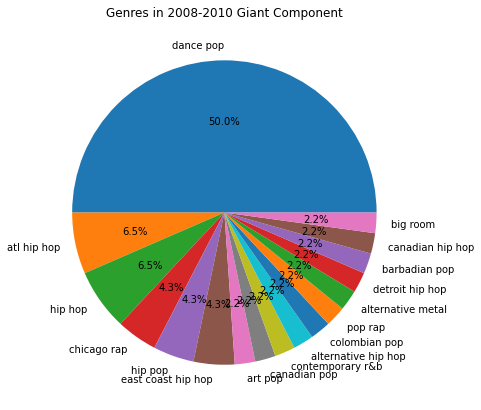

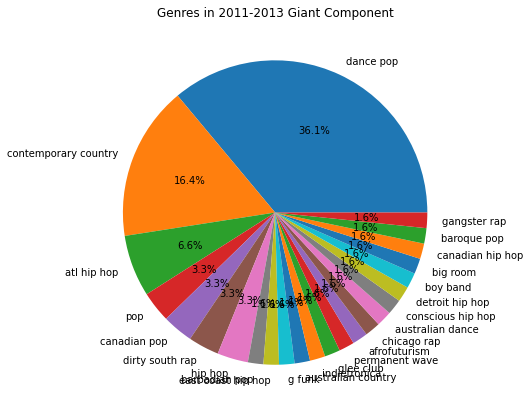

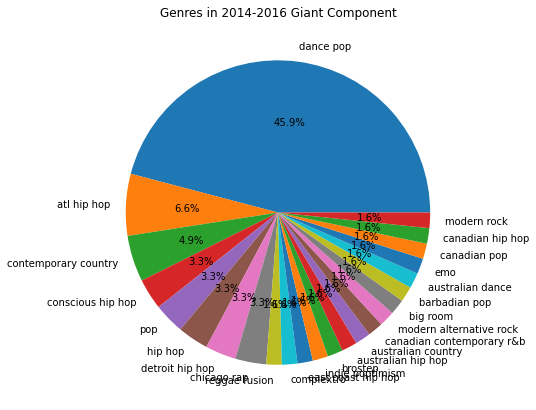

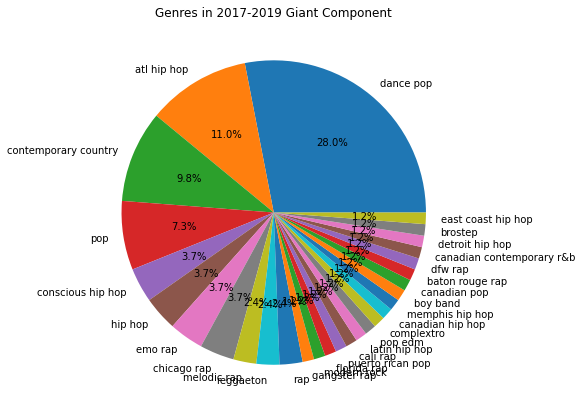

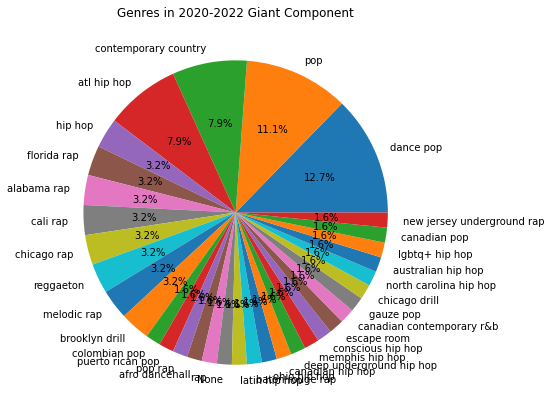

In [217]:
gc_artists = [[n_t_a[n] for n in S.nodes()] for S, n_t_a in zip(giant_components, num_to_artist)]
gc_genres  = [pd.Series([artist_to_genre[a] for a in gc_artist]) for gc_artist in gc_artists]
val_counts = [s.value_counts(normalize=True) for s in gc_genres]
for j, v in enumerate(val_counts):
    plt.figure(figsize=(7,7))
    plt.pie(v, labels=v.index, autopct='%1.1f%%')
    plt.title(f'Genres in {years[j]} Giant Component')
plt.show()

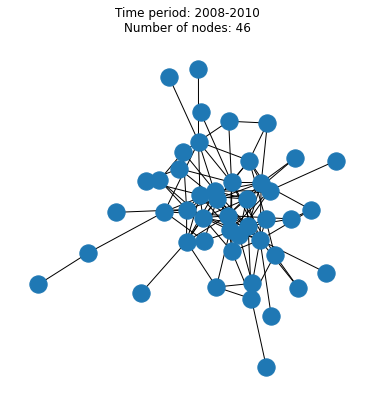

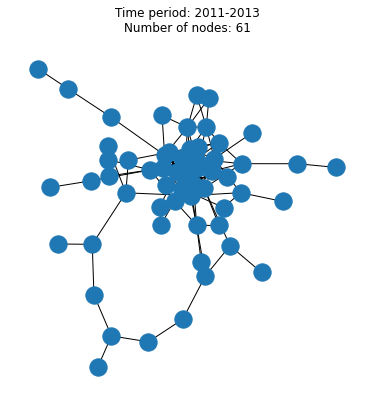

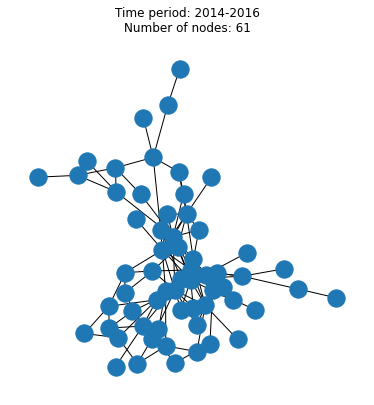

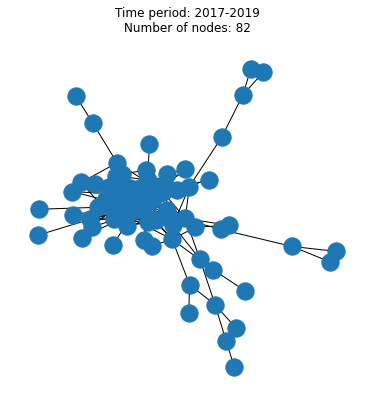

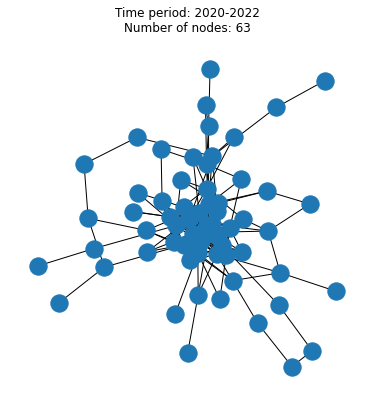

In [195]:
# plot each giant component
for j, S in enumerate(giant_components):
    n = nx.number_of_nodes(S)
    plt.figure(figsize=(5,5))
    nx.draw(S)
    plt.title(f'Time period: {years[j]}\nNumber of nodes: {n}')
plt.show()

## Case study: Drake

In [139]:
# check that Drake is in each Hot 100 list
['Drake' in artist.tolist() for artist in artists]

[True, True, True, True, True]

In [238]:
# check that Drake is in each giant component
[a_to_n['Drake'] in list(G.nodes) for G, a_to_n in zip(giant_components, artist_to_num)]

[True, True, True, True, True]

In [253]:
artist_to_num = [{name: i for i, name in n_t_a.items()} for n_t_a in num_to_artist]
drake_rank    = [a_t_n['Drake'] for a_t_n in artist_to_num]
drake_rank, artist_to_genre['Drake']

([16, 8, 4, 0, 1], 'canadian hip hop')

In [262]:
# get Drake's betweenness centrality rank
drake_btwn = []
for item in full_list:
    for i in range(len(item)):
        if item[i][0] == 'Drake':
            drake_btwn.append(i)
drake_btwn

[17, 34, 14, 27, 16]

In [264]:
# get Drake's degree rank in each year
mosts = [most(deg, j)[2] for j, deg in enumerate(degrees)]
drake_deg = []
for r, most in zip(drake_rank,mosts):
    for i in range(len(most)):
        if most[i][0] == r:
            drake_deg.append(i)
drake_deg

[8, 9, 5, 7, 9]

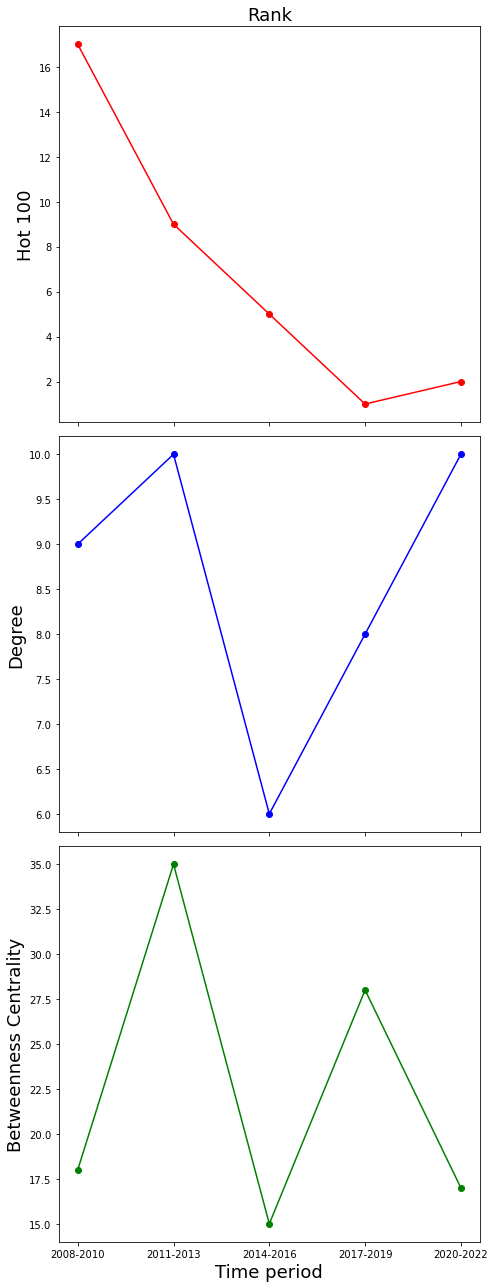

In [274]:
drake_rank_ = np.array(drake_rank) + 1
drake_btwn_ = np.array(drake_btwn) + 1
drake_deg_  = np.array(drake_deg) + 1

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7,18))
axs[0].plot(years, drake_rank_, color = 'red')
axs[0].scatter(years, drake_rank_, color = 'red')
axs[0].set_ylabel('Hot 100', fontsize=18)
axs[0].set_title('Rank', fontsize=18)
axs[1].plot(years, drake_deg_, color = 'blue')
axs[1].scatter(years, drake_deg_, color = 'blue')
axs[1].set_ylabel('Degree', fontsize=18)
axs[2].plot(years, drake_btwn_, color = 'green')
axs[2].scatter(years, drake_btwn_, color = 'green')
axs[2].set_ylabel('Betweenness Centrality', fontsize=18)
plt.xlabel('Time period', fontsize=18)
plt.tight_layout()

In [272]:
# correlation between all
all_drake = np.array([drake_rank_, drake_deg_, drake_btwn_])
np.corrcoef(all_drake)

array([[ 1.        ,  0.19778949, -0.04674823],
       [ 0.19778949,  1.        ,  0.4223032 ],
       [-0.04674823,  0.4223032 ,  1.        ]])